https://www.nature.com/articles/s41534-021-00369-3.pdf?proof=t%2525C2%2525A0

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# importing Qiskit
from qiskit import IBMQ, Aer, assemble, transpile
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.providers.ibmq import least_busy

# import basic plot tools
from qiskit.visualization import plot_histogram

In [29]:
dict = {
    'a' : '01100001',
    'b' : '01100010',
    'c' : '01100011',
    'd' : '01100100',
    'e' : '01100101',
    'f' : '01100110',
    'g' : '01100111',
    'h' : '01101000',
    'i' : '01101001',
    'j' : '01101010',
    'k' : '01101011',
    'l' : '01101100',
    'm' : '01101101',
    'n' : '01101110',
    'o' : '01101111',
    'p' : '01110000',
    'q' : '01110001',
    'r' : '01110010',
    's' : '01110011',
    't' : '01110100',
    'u' : '01110101',
    'v' : '01110110',
    'w' : '01110111',
    'x' : '01111000',
    'y' : '01111001',
    'z' : '01111010'
}

# # cut em to 3 bits
# a = '001'
# b = '010'
# c = '111'

# #our pattern
p = dict['n']

#our input string
s = dict['g']

In [30]:
n = len(p)
input_s = QuantumRegister(n)
pattern_s = QuantumRegister(n)
aux = QuantumRegister(n)
aux_mes = ClassicalRegister(n)
compare_circuit = QuantumCircuit()
compare_circuit.add_register(input_s, pattern_s, aux, aux_mes)
compare_circuit.x(aux)

In [31]:
for i, q in enumerate(compare_circuit.qregs[0]):
    if s[i] == '1':
        compare_circuit.x(input_s[i])
#         compare_circuit.cx(input_s[i], aux[i])
    if p[i] == '1':
        compare_circuit.x(pattern_s[i])

compare_circuit.barrier()
# compare_circuit.h(aux)
# compare_circuit.barrier()
compare_circuit.draw()

░ 
q12_0: ──────░─
       ┌───┐ ░ 
q12_1: ┤ X ├─░─
       ├───┤ ░ 
q12_2: ┤ X ├─░─
       └───┘ ░ 
q12_3: ──────░─
             ░ 
q12_4: ──────░─
       ┌───┐ ░ 
q12_5: ┤ X ├─░─
       ├───┤ ░ 
q12_6: ┤ X ├─░─
       ├───┤ ░ 
q12_7: ┤ X ├─░─
       └───┘ ░ 
q13_0: ──────░─
       ┌───┐ ░ 
q13_1: ┤ X ├─░─
       ├───┤ ░ 
q13_2: ┤ X ├─░─
       └───┘ ░ 
q13_3: ──────░─
       ┌───┐ ░ 
q13_4: ┤ X ├─░─
       ├───┤ ░ 
q13_5: ┤ X ├─░─
       ├───┤ ░ 
q13_6: ┤ X ├─░─
       └───┘ ░ 
q13_7: ──────░─
       ┌───┐ ░ 
q14_0: ┤ X ├─░─
       ├───┤ ░ 
q14_1: ┤ X ├─░─
       ├───┤ ░ 
q14_2: ┤ X ├─░─
       ├───┤ ░ 
q14_3: ┤ X ├─░─
       ├───┤ ░ 
q14_4: ┤ X ├─░─
       ├───┤ ░ 
q14_5: ┤ X ├─░─
       ├───┤ ░ 
q14_6: ┤ X ├─░─
       ├───┤ ░ 
q14_7: ┤ X ├─░─
       └───┘ ░ 
 c4: 8/════════

In [32]:
for i, q in enumerate(compare_circuit.qregs[0]):
    compare_circuit.cx(input_s[i], aux[i])
    compare_circuit.cx(pattern_s[i], aux[i])
    
compare_circuit.draw()

░                                                             »
q12_0: ──────░───■─────────────────────────────────────────────────────────»
       ┌───┐ ░   │                                                         »
q12_1: ┤ X ├─░───┼────■────────────────────────────────────────────────────»
       ├───┤ ░   │    │                                                    »
q12_2: ┤ X ├─░───┼────┼────■───────────────────────────────────────────────»
       └───┘ ░   │    │    │                                               »
q12_3: ──────░───┼────┼────┼────■──────────────────────────────────────────»
             ░   │    │    │    │                                          »
q12_4: ──────░───┼────┼────┼────┼────■─────────────────────────────────────»
       ┌───┐ ░   │    │    │    │    │                                     »
q12_5: ┤ X ├─░───┼────┼────┼────┼────┼────■────────────────────────────────»
       ├───┤ ░   │    │    │    │    │    │                                »
q12_6: ┤ X ├─░───┼────┼────┼────┼────┼────┼────■───────────────────────────»
       ├───┤ ░   │    │    │    │    │    │    │                           »
q12_7: ┤ X ├─░───┼────┼────┼────┼────┼────┼────┼────■──────────────────────»
       └───┘ ░   │    │    │    │    │    │    │    │                      »
q13_0: ──────░───┼────┼────┼────┼────┼────┼────┼────┼────■─────────────────»
       ┌───┐ ░   │    │    │    │    │    │    │    │    │                 »
q13_1: ┤ X ├─░───┼────┼────┼────┼────┼────┼────┼────┼────┼────■────────────»
       ├───┤ ░   │    │    │    │    │    │    │    │    │    │            »
q13_2: ┤ X ├─░───┼────┼────┼────┼────┼────┼────┼────┼────┼────┼────■───────»
       └───┘ ░   │    │    │    │    │    │    │    │    │    │    │       »
q13_3: ──────░───┼────┼────┼────┼────┼────┼────┼────┼────┼────┼────┼────■──»
       ┌───┐ ░   │    │    │    │    │    │    │    │    │    │    │    │  »
q13_4: ┤ X ├─░───┼────┼────┼────┼────┼────┼────┼────┼────┼────┼────┼────┼──»
       ├───┤ ░   │    │    │    │    │    │    │    │    │    │    │    │  »
q13_5: ┤ X ├─░───┼────┼────┼────┼────┼────┼────┼────┼────┼────┼────┼────┼──»
       ├───┤ ░   │    │    │    │    │    │    │    │    │    │    │    │  »
q13_6: ┤ X ├─░───┼────┼────┼────┼────┼────┼────┼────┼────┼────┼────┼────┼──»
       └───┘ ░   │    │    │    │    │    │    │    │    │    │    │    │  »
q13_7: ──────░───┼────┼────┼────┼────┼────┼────┼────┼────┼────┼────┼────┼──»
       ┌───┐ ░ ┌─┴─┐  │    │    │    │    │    │    │  ┌─┴─┐  │    │    │  »
q14_0: ┤ X ├─░─┤ X ├──┼────┼────┼────┼────┼────┼────┼──┤ X ├──┼────┼────┼──»
       ├───┤ ░ └───┘┌─┴─┐  │    │    │    │    │    │  └───┘┌─┴─┐  │    │  »
q14_1: ┤ X ├─░──────┤ X ├──┼────┼────┼────┼────┼────┼───────┤ X ├──┼────┼──»
       ├───┤ ░      └───┘┌─┴─┐  │    │    │    │    │       └───┘┌─┴─┐  │  »
q14_2: ┤ X ├─░───────────┤ X ├──┼────┼────┼────┼────┼────────────┤ X ├──┼──»
       ├───┤ ░           └───┘┌─┴─┐  │    │    │    │            └───┘┌─┴─┐»
q14_3: ┤ X ├─░────────────────┤ X ├──┼────┼────┼────┼─────────────────┤ X ├»
       ├───┤ ░                └───┘┌─┴─┐  │    │    │                 └───┘»
q14_4: ┤ X ├─░─────────────────────┤ X ├──┼────┼────┼──────────────────────»
       ├───┤ ░                     └───┘┌─┴─┐  │    │                      »
q14_5: ┤ X ├─░──────────────────────────┤ X ├──┼────┼──────────────────────»
       ├───┤ ░                          └───┘┌─┴─┐  │                      »
q14_6: ┤ X ├─░───────────────────────────────┤ X ├──┼──────────────────────»
       ├───┤ ░                               └───┘┌─┴─┐                    »
q14_7: ┤ X ├─░────────────────────────────────────┤ X ├────────────────────»
       └───┘ ░                                    └───┘                    »
 c4: 8/════════════════════════════════════════════════════════════════════»
                                                                           »
«                           
«q12_0: ────────────────────
«                           

In [33]:
compare_circuit.h(aux)
compare_circuit.z(aux) # Oracle
all_pairs = []
queue = []
for i, q in enumerate(compare_circuit.qregs[0]):
    for j, q in enumerate(compare_circuit.qregs[0]):
        if j != i:
            if [i,j] not in all_pairs and [j,i] not in all_pairs:
                queue.append([i,j])
                all_pairs.append([i,j])
                all_pairs.append([j,i])
#                 print(all_pairs)
                compare_circuit.cz(aux[i],aux[j])
# compare_circuit.cz(aux[0],aux[1])
# compare_circuit.cz(aux[0],aux[2])
# compare_circuit.cz(aux[1],aux[2])
compare_circuit.barrier()
compare_circuit.draw()

░                                                             »
q12_0: ──────░───■─────────────────────────────────────────────────────────»
       ┌───┐ ░   │                                                         »
q12_1: ┤ X ├─░───┼────■────────────────────────────────────────────────────»
       ├───┤ ░   │    │                                                    »
q12_2: ┤ X ├─░───┼────┼────■───────────────────────────────────────────────»
       └───┘ ░   │    │    │                                               »
q12_3: ──────░───┼────┼────┼────■──────────────────────────────────────────»
             ░   │    │    │    │                                          »
q12_4: ──────░───┼────┼────┼────┼────■─────────────────────────────────────»
       ┌───┐ ░   │    │    │    │    │                                     »
q12_5: ┤ X ├─░───┼────┼────┼────┼────┼────■────────────────────────────────»
       ├───┤ ░   │    │    │    │    │    │                                »
q12_6: ┤ X ├─░───┼────┼────┼────┼────┼────┼────■───────────────────────────»
       ├───┤ ░   │    │    │    │    │    │    │                           »
q12_7: ┤ X ├─░───┼────┼────┼────┼────┼────┼────┼────■──────────────────────»
       └───┘ ░   │    │    │    │    │    │    │    │                      »
q13_0: ──────░───┼────┼────┼────┼────┼────┼────┼────┼────■─────────────────»
       ┌───┐ ░   │    │    │    │    │    │    │    │    │                 »
q13_1: ┤ X ├─░───┼────┼────┼────┼────┼────┼────┼────┼────┼────■────────────»
       ├───┤ ░   │    │    │    │    │    │    │    │    │    │            »
q13_2: ┤ X ├─░───┼────┼────┼────┼────┼────┼────┼────┼────┼────┼────■───────»
       └───┘ ░   │    │    │    │    │    │    │    │    │    │    │       »
q13_3: ──────░───┼────┼────┼────┼────┼────┼────┼────┼────┼────┼────┼────■──»
       ┌───┐ ░   │    │    │    │    │    │    │    │    │    │    │    │  »
q13_4: ┤ X ├─░───┼────┼────┼────┼────┼────┼────┼────┼────┼────┼────┼────┼──»
       ├───┤ ░   │    │    │    │    │    │    │    │    │    │    │    │  »
q13_5: ┤ X ├─░───┼────┼────┼────┼────┼────┼────┼────┼────┼────┼────┼────┼──»
       ├───┤ ░   │    │    │    │    │    │    │    │    │    │    │    │  »
q13_6: ┤ X ├─░───┼────┼────┼────┼────┼────┼────┼────┼────┼────┼────┼────┼──»
       └───┘ ░   │    │    │    │    │    │    │    │    │    │    │    │  »
q13_7: ──────░───┼────┼────┼────┼────┼────┼────┼────┼────┼────┼────┼────┼──»
       ┌───┐ ░ ┌─┴─┐  │    │    │    │    │    │    │  ┌─┴─┐  │    │    │  »
q14_0: ┤ X ├─░─┤ X ├──┼────┼────┼────┼────┼────┼────┼──┤ X ├──┼────┼────┼──»
       ├───┤ ░ └───┘┌─┴─┐  │    │    │    │    │    │  └───┘┌─┴─┐  │    │  »
q14_1: ┤ X ├─░──────┤ X ├──┼────┼────┼────┼────┼────┼───────┤ X ├──┼────┼──»
       ├───┤ ░      └───┘┌─┴─┐  │    │    │    │    │       └───┘┌─┴─┐  │  »
q14_2: ┤ X ├─░───────────┤ X ├──┼────┼────┼────┼────┼────────────┤ X ├──┼──»
       ├───┤ ░           └───┘┌─┴─┐  │    │    │    │            └───┘┌─┴─┐»
q14_3: ┤ X ├─░────────────────┤ X ├──┼────┼────┼────┼─────────────────┤ X ├»
       ├───┤ ░                └───┘┌─┴─┐  │    │    │                 └───┘»
q14_4: ┤ X ├─░─────────────────────┤ X ├──┼────┼────┼──────────────────────»
       ├───┤ ░                     └───┘┌─┴─┐  │    │                      »
q14_5: ┤ X ├─░──────────────────────────┤ X ├──┼────┼──────────────────────»
       ├───┤ ░                          └───┘┌─┴─┐  │                      »
q14_6: ┤ X ├─░───────────────────────────────┤ X ├──┼──────────────────────»
       ├───┤ ░                               └───┘┌─┴─┐                    »
q14_7: ┤ X ├─░────────────────────────────────────┤ X ├────────────────────»
       └───┘ ░                                    └───┘                    »
 c4: 8/════════════════════════════════════════════════════════════════════»
                                                                           »
«                                                                            »
«q12_0:

In [34]:
# compare_circuit.x(aux)
compare_circuit.h(aux)
compare_circuit.z(aux)
# print(queue[len(queue)-i-1][0])
for i in range(len(queue)):
    compare_circuit.cz(aux[queue[len(queue)-i-1][0]],aux[queue[len(queue)-i-1][1]])
# compare_circuit.cz(aux[1],aux[2])
# compare_circuit.cz(aux[0],aux[2])
# compare_circuit.cz(aux[0],aux[1])
# compare_circuit.t(aux)
compare_circuit.h(aux)
compare_circuit.barrier()
# compare_circuit.x(aux)
# compare_circuit.z(aux)
# compare_circuit.cz(aux[0],aux[1])
# compare_circuit.h(aux)
# compare_circuit.x(aux)
# for i, q in enumerate(compare_circuit.qregs[0]):
#         compare_circuit.cx(input_s[i], aux[i])
compare_circuit.draw()

░                                                             »
q12_0: ──────░───■─────────────────────────────────────────────────────────»
       ┌───┐ ░   │                                                         »
q12_1: ┤ X ├─░───┼────■────────────────────────────────────────────────────»
       ├───┤ ░   │    │                                                    »
q12_2: ┤ X ├─░───┼────┼────■───────────────────────────────────────────────»
       └───┘ ░   │    │    │                                               »
q12_3: ──────░───┼────┼────┼────■──────────────────────────────────────────»
             ░   │    │    │    │                                          »
q12_4: ──────░───┼────┼────┼────┼────■─────────────────────────────────────»
       ┌───┐ ░   │    │    │    │    │                                     »
q12_5: ┤ X ├─░───┼────┼────┼────┼────┼────■────────────────────────────────»
       ├───┤ ░   │    │    │    │    │    │                                »
q12_6: ┤ X ├─░───┼────┼────┼────┼────┼────┼────■───────────────────────────»
       ├───┤ ░   │    │    │    │    │    │    │                           »
q12_7: ┤ X ├─░───┼────┼────┼────┼────┼────┼────┼────■──────────────────────»
       └───┘ ░   │    │    │    │    │    │    │    │                      »
q13_0: ──────░───┼────┼────┼────┼────┼────┼────┼────┼────■─────────────────»
       ┌───┐ ░   │    │    │    │    │    │    │    │    │                 »
q13_1: ┤ X ├─░───┼────┼────┼────┼────┼────┼────┼────┼────┼────■────────────»
       ├───┤ ░   │    │    │    │    │    │    │    │    │    │            »
q13_2: ┤ X ├─░───┼────┼────┼────┼────┼────┼────┼────┼────┼────┼────■───────»
       └───┘ ░   │    │    │    │    │    │    │    │    │    │    │       »
q13_3: ──────░───┼────┼────┼────┼────┼────┼────┼────┼────┼────┼────┼────■──»
       ┌───┐ ░   │    │    │    │    │    │    │    │    │    │    │    │  »
q13_4: ┤ X ├─░───┼────┼────┼────┼────┼────┼────┼────┼────┼────┼────┼────┼──»
       ├───┤ ░   │    │    │    │    │    │    │    │    │    │    │    │  »
q13_5: ┤ X ├─░───┼────┼────┼────┼────┼────┼────┼────┼────┼────┼────┼────┼──»
       ├───┤ ░   │    │    │    │    │    │    │    │    │    │    │    │  »
q13_6: ┤ X ├─░───┼────┼────┼────┼────┼────┼────┼────┼────┼────┼────┼────┼──»
       └───┘ ░   │    │    │    │    │    │    │    │    │    │    │    │  »
q13_7: ──────░───┼────┼────┼────┼────┼────┼────┼────┼────┼────┼────┼────┼──»
       ┌───┐ ░ ┌─┴─┐  │    │    │    │    │    │    │  ┌─┴─┐  │    │    │  »
q14_0: ┤ X ├─░─┤ X ├──┼────┼────┼────┼────┼────┼────┼──┤ X ├──┼────┼────┼──»
       ├───┤ ░ └───┘┌─┴─┐  │    │    │    │    │    │  └───┘┌─┴─┐  │    │  »
q14_1: ┤ X ├─░──────┤ X ├──┼────┼────┼────┼────┼────┼───────┤ X ├──┼────┼──»
       ├───┤ ░      └───┘┌─┴─┐  │    │    │    │    │       └───┘┌─┴─┐  │  »
q14_2: ┤ X ├─░───────────┤ X ├──┼────┼────┼────┼────┼────────────┤ X ├──┼──»
       ├───┤ ░           └───┘┌─┴─┐  │    │    │    │            └───┘┌─┴─┐»
q14_3: ┤ X ├─░────────────────┤ X ├──┼────┼────┼────┼─────────────────┤ X ├»
       ├───┤ ░                └───┘┌─┴─┐  │    │    │                 └───┘»
q14_4: ┤ X ├─░─────────────────────┤ X ├──┼────┼────┼──────────────────────»
       ├───┤ ░                     └───┘┌─┴─┐  │    │                      »
q14_5: ┤ X ├─░──────────────────────────┤ X ├──┼────┼──────────────────────»
       ├───┤ ░                          └───┘┌─┴─┐  │                      »
q14_6: ┤ X ├─░───────────────────────────────┤ X ├──┼──────────────────────»
       ├───┤ ░                               └───┘┌─┴─┐                    »
q14_7: ┤ X ├─░────────────────────────────────────┤ X ├────────────────────»
       └───┘ ░                                    └───┘                    »
 c4: 8/════════════════════════════════════════════════════════════════════»
                                                                           »
«                                                                            »
«q12_0:

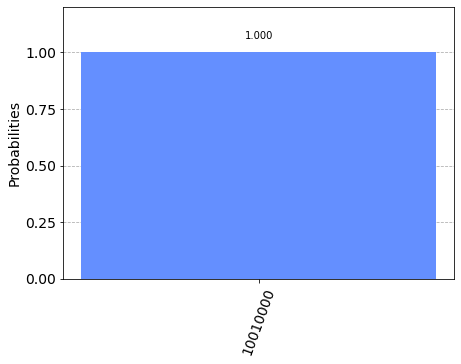

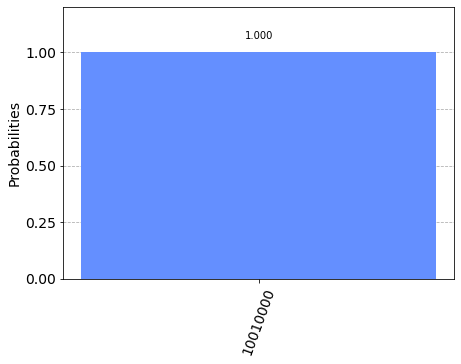

In [35]:
compare_circuit.measure(aux, aux_mes)

aer_sim = Aer.get_backend('aer_simulator')
qobj = assemble(compare_circuit)
result = aer_sim.run(qobj).result()
counts = result.get_counts()
plot_histogram(counts)

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# importing Qiskit
from qiskit import IBMQ, Aer, assemble, transpile
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.providers.ibmq import least_busy

# import basic plot tools
from qiskit.visualization import plot_histogram
import array

class Comparator:
    
    def __init__(self, pattern, string, abort, dictionary):
        self.pattern_s = list(pattern)
        self.input_s = list(string)
        self.aux = None
        self.aux_mes = None
        self.compare_circuit = None
        self.queue = None
        self.counts = None
        self.abort = abort
        self.dict = dictionary
    
    def compare(self):
        for p, s in zip(self.pattern_s, self.input_s):
            print(p,s)
            self._init_circuit(self.dict[p], self.dict[s])
            self._set_states(self.dict[p], self.dict[s])
            self._xor()
            self._oracle()
            self._diffusor()
            self._check()
            if self.abort and self.counts.popitem()[0] != '0' * len(self.dict[p]):
                print("strings are different!")
                return
        if self.abort:
            print("strings are the same ^.^")
    
    def _init_circuit(self, p, s):
        print(p,s)
        n = len(p)
        self.input_s = QuantumRegister(n)
        self.pattern_s = QuantumRegister(n)
        self.aux = QuantumRegister(n)
        self.aux_mes = ClassicalRegister(n)
        self.compare_circuit = QuantumCircuit()
        self.compare_circuit.add_register(self.input_s, self.pattern_s, self.aux, self.aux_mes)
        self.compare_circuit.x(self.aux)
    
    def _set_states(self, p, s):
        for i, q in enumerate(self.compare_circuit.qregs[0]):
            if s[i] == '1':
                self.compare_circuit.x(self.input_s[i])
            if p[i] == '1':
                self.compare_circuit.x(self.pattern_s[i])

        self.compare_circuit.barrier()
#         self.compare_circuit.draw()
        
    def _xor(self):
        for i, q in enumerate(self.compare_circuit.qregs[0]):
            self.compare_circuit.cx(self.input_s[i], self.aux[i])
            self.compare_circuit.cx(self.pattern_s[i], self.aux[i])

#         self.compare_circuit.draw()
        
    def _oracle(self):
        self.compare_circuit.h(self.aux)
        self.compare_circuit.z(self.aux)
        all_pairs = []
        self.queue = []
        for i, q in enumerate(self.compare_circuit.qregs[0]):
            for j, q in enumerate(self.compare_circuit.qregs[0]):
                if j != i:
                    if [i,j] not in all_pairs and [j,i] not in all_pairs:
                        self.queue.append([i,j])
                        all_pairs.append([i,j])
                        all_pairs.append([j,i])
                        self.compare_circuit.cz(self.aux[i],self.aux[j])

        self.compare_circuit.barrier()
#         self.compare_circuit.draw()
        
    def _diffusor(self):
        self.compare_circuit.h(self.aux)
        self.compare_circuit.z(self.aux)
        for i in range(len(self.queue)):
            self.compare_circuit.cz(self.aux[self.queue[len(self.queue)-i-1][0]],self.aux[self.queue[len(self.queue)-i-1][1]])
        self.compare_circuit.h(self.aux)
        
        self.compare_circuit.barrier()
#         compare_circuit.draw()
        
    def _check(self):
        self.compare_circuit.measure(self.aux, self.aux_mes)
        aer_sim = Aer.get_backend('aer_simulator')
        qobj = assemble(self.compare_circuit)
        result = aer_sim.run(qobj).result()
        self.counts = result.get_counts()
        print(self.counts)
#         plot_histogram(counts)

In [7]:
dictionary = {
            'a' : '01100001',
            'b' : '01100010',
            'c' : '01100011',
            'd' : '01100100',
            'e' : '01100101',
            'f' : '01100110',
            'g' : '01100111',
            'h' : '01101000',
            'i' : '01101001',
            'j' : '01101010',
            'k' : '01101011',
            'l' : '01101100',
            'm' : '01101101',
            'n' : '01101110',
            'o' : '01101111',
            'p' : '01110000',
            'q' : '01110001',
            'r' : '01110010',
            's' : '01110011',
            't' : '01110100',
            'u' : '01110101',
            'v' : '01110110',
            'w' : '01110111',
            'x' : '01111000',
            'y' : '01111001',
            'z' : '01111010'
        }
pattern = 'vovka'
string = 'putin'
QC1 = Comparator(pattern=pattern,
                 string=string,
                 abort=True,
                 dictionary=dictionary,
                )
QC1.compare()
# QC1.compare_circuit.draw()

v p
01110110 01110000
{'01100000': 1024}
strings are different!
